# TensorFlow for Deep Learning - Basics

## 0. Implementing MLPs with Keras

Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate, and execute all sorts of neural networks. At present, you can choose from three popular open source Deep Learning libraries: TensorFlow, Microsoft Cognitive Toolkit (CNTK), and Theano. Therefore, to avoid any confusion, we will refer to this reference implementation as multibackend Keras. TensorFlow itself now comes bundled with its own Keras implementation, tf.keras. It only supports TensorFlow as the backend, but it has the advantage of offering some very useful extra features: for example, it supports TensorFlow’s Data API, which makes it easy to load and preprocess data efficiently. 

<img src="images/Keras.png" width="400"/>

The most popular Deep Learning library, after Keras and TensorFlow, is Facebook’s PyTorch library. The good news is that its API is quite similar to Keras’s (in part because both APIs were inspired by Scikit-Learn and Chainer), so once you know Keras, it is not difficult to switch to PyTorch. PyTorch’s popularity grew exponentially in 2018, largely thanks to its simplicity and excellent documentation, which were not TensorFlow 1.x’s main strengths. However, TensorFlow 2 is arguably just as simple as PyTorch, as it has adopted Keras as its official high-level API.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## 1. Building an Image Classifier Using the Sequential AP

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
# Sequential model
model_sequential_classifier = keras.models.Sequential()
model_sequential_classifier.add(keras.layers.Flatten(input_shape=[28, 28]))
model_sequential_classifier.add(keras.layers.Dense(300, activation="relu"))
model_sequential_classifier.add(keras.layers.Dense(100, activation="relu"))
model_sequential_classifier.add(keras.layers.Dense(10, activation="softmax"))
model_sequential_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Weights and biases
hidden1 = model_sequential_classifier.layers[1]
wts, biases = hidden1.get_weights()
wts

array([[-0.02842717, -0.01261461, -0.05655412, ..., -0.06762404,
        -0.05415174, -0.05741376],
       [-0.01618322, -0.02479979,  0.00765809, ...,  0.00520895,
         0.00078505,  0.0383066 ],
       [-0.03541095,  0.05720207,  0.00534138, ...,  0.01997437,
         0.00219226, -0.0122336 ],
       ...,
       [-0.0075608 ,  0.07363968,  0.00311099, ..., -0.05521853,
         0.01967777, -0.04235484],
       [-0.00054856, -0.02748191, -0.02409462, ..., -0.05871233,
         0.0617501 ,  0.0582601 ],
       [ 0.00605027, -0.07076041,  0.03132521, ...,  0.06103665,
         0.01425795,  0.01812878]], dtype=float32)

In [5]:
# Compiling
model_sequential_classifier.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", metrics=["accuracy"])
              
# Training and evaluating the model
history = model_sequential_classifier.fit(X_train, y_train, epochs=50, batch_size=1000, 
                                          validation_data=(X_valid, y_valid), validation_batch_size=1000)

Epoch 1/50
55/55 [==============================] - 2s 34ms/step - loss: 2.1576 - accuracy: 0.2654 - val_loss: 1.5891 - val_accuracy: 0.5932
Epoch 2/50
55/55 [==============================] - 1s 10ms/step - loss: 1.4803 - accuracy: 0.6149 - val_loss: 1.1798 - val_accuracy: 0.6786
Epoch 3/50
55/55 [==============================] - 0s 9ms/step - loss: 1.1357 - accuracy: 0.6734 - val_loss: 0.9745 - val_accuracy: 0.7090
Epoch 4/50
55/55 [==============================] - 0s 9ms/step - loss: 0.9621 - accuracy: 0.7025 - val_loss: 0.8661 - val_accuracy: 0.7392
Epoch 5/50
55/55 [==============================] - 0s 9ms/step - loss: 0.8574 - accuracy: 0.7302 - val_loss: 0.7983 - val_accuracy: 0.7524
Epoch 6/50
55/55 [==============================] - 1s 9ms/step - loss: 0.8014 - accuracy: 0.7455 - val_loss: 0.7502 - val_accuracy: 0.7664
Epoch 7/50
55/55 [==============================] - 1s 9ms/step - loss: 0.7501 - accuracy: 0.7603 - val_loss: 0.7138 - val_accuracy: 0.7752
Epoch 8/50
55/55 [

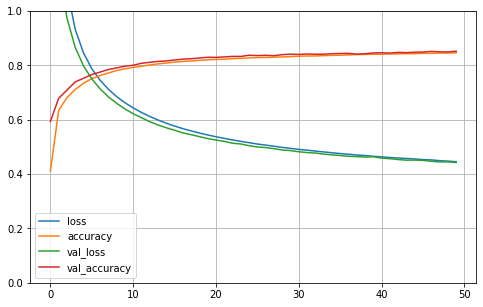

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
 
# Using history to plot all at once
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [7]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model_sequential_classifier.predict(X_new)
y_pred = tf.argmax(y_proba, axis=-1)

y_proba.round(2), np.array(class_names)[y_pred.numpy()], np.array(class_names)[y_test[:3]]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'),
 array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))

## 1.a Saving and Restoring a Model

Keras will use the HDF5 format to save both the model??s architecture (including every layer's hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have). This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. You can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

In [8]:
model_sequential_classifier.save("modules/my_keras_model.h5")

In [9]:
model_sequential_classifier_new = keras.models.load_model("modules/my_keras_model.h5")

# Using the model to make predictions
X_new = X_test[:3]
y_proba = model_sequential_classifier_new.predict(X_new)
y_pred = tf.argmax(y_proba, axis=-1)

y_proba.round(2), np.array(class_names)[y_pred.numpy()], np.array(class_names)[y_test[:3]]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'),
 array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))

## 1.b TensorBoard for Visualization 

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between
multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex  multidimensional data projected down to 3D and automatically clustered for you, and more! 

To use it, you must modify your program so that it outputs the data you
want to visualize to special binary log files called event files. Each binary
data record is called a summary. The TensorBoard server will monitor the
log directory, and it will automatically pick up the changes and update the
visualizations: this allows you to visualize live data (with a short delay),
such as the learning curves during training. In general, you want to point the 
TensorBoard server to a root log directory and configure your program so
that it writes to a different subdirectory every time it runs. This way, the
same TensorBoard server instance will allow you to visualize and compare
data from multiple runs of your program, without getting everything mixed
up.

Let's start by defining the root log directory we will use for our
TensorBoard logs, plus a small function that will generate a subdirectory
path based on the current date and time so that it??s different at every run.
You may want to include extra information in the log directory name, such
as hyperparameter values that you are testing, to make it easier to know
what you are looking at in TensorBoard:

In [10]:
import os
root_logdir = os.path.join(os.curdir, "my_logs") 
 
def get_run_logdir(): 
    import time 
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id) 
 
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [11]:
# [...] # Build and compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model_sequential_classifier.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[tensorboard_cb])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4630 - accuracy: 0.8377 - val_loss: 0.4163 - val_accuracy: 0.8598
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4258 - accuracy: 0.8513 - val_loss: 0.4053 - val_accuracy: 0.8642
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4037 - accuracy: 0.8581 - val_loss: 0.3991 - val_accuracy: 0.8622
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3861 - accuracy: 0.8651 - val_loss: 0.3915 - val_accuracy: 0.8694
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8683 - val_loss: 0.3834 - val_accuracy: 0.8648
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3595 - accuracy: 0.8730 - val_loss: 0.3656 - val_accuracy: 0.8752
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3495 - accuracy: 0.8768 - val_loss: 0.3864 - val_accuracy:

In [12]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 9305), started 22:08:47 ago. (Use '!kill 9305' to kill it.)

## 2. Building a Regression MLP Using the Sequential API

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
 
housing = fetch_california_housing() 
 
X_train_full, X_test, y_train_full, y_test = train_test_split( 
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( 
    X_train_full, y_train_full) 
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [14]:
model = keras.models.Sequential([ 
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3757 - val_loss: 0.5343
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5616 - val_loss: 0.4720
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5613 - val_loss: 0.4571
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4465 - val_loss: 0.4326
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4303 - val_loss: 0.4217
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4247 - val_loss: 0.4284
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3987 - val_loss: 0.4019
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4095 - val_loss: 0.3996
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3839 - val_loss: 0.3958
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3747 - val_loss: 0.3913

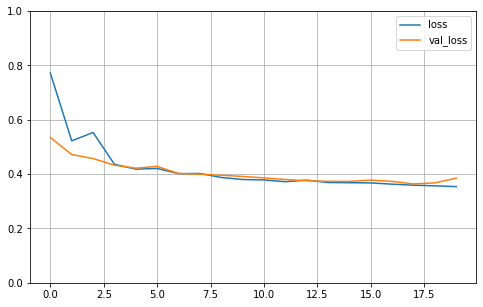

In [15]:
# Using history to plot all at once
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [16]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 695us/step - loss: 0.4352


0.4351992607116699

In [17]:
X_new = X_test[:3]
model.predict(X_new), y_test[:3]

(array([[1.2893356],
        [1.4023297],
        [1.3759431]], dtype=float32),
 array([1.051, 1.393, 1.766]))

## 3. Building Complex Models Using the Functional API

In [18]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [19]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.2476 - val_loss: 0.5882
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7568 - val_loss: 0.4737
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 1.8179 - val_loss: 0.4525
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5770 - val_loss: 0.4308
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3954 - val_loss: 0.4926
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4528 - val_loss: 0.4150
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4159 - val_loss: 0.3946
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9666 - val_loss: 0.3754
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3763 - val_loss: 0.3944
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5864 - val_loss: 0.3635

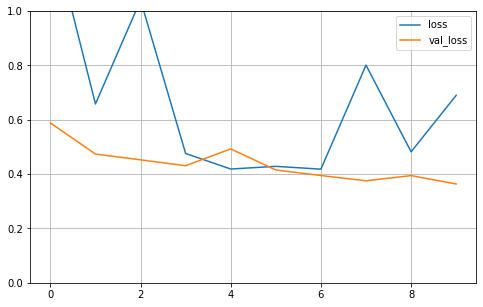

In [20]:
# Using history to plot all at once
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [22]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) 
 
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3] 
 
history = model.fit((X_train_A, X_train_B), y_train, epochs=10, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3982 - val_loss: 0.8423
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7811 - val_loss: 0.6960
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6563 - val_loss: 0.6399
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6217 - val_loss: 0.6032
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6086 - val_loss: 0.5758
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5578 - val_loss: 0.5527
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5530 - val_loss: 0.5345
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4910 - val_loss: 0.5189
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5357 - val_loss: 0.5054
Epoch 10/10
162/162 [==============================] - 0s 771us/step - loss: 0.5307


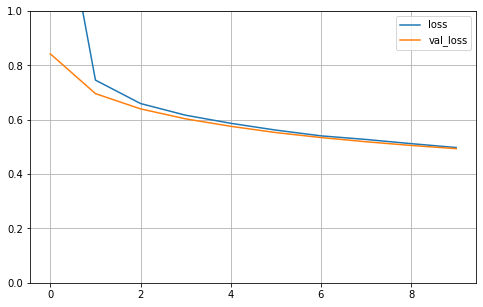

In [23]:
# Using history to plot all at once
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## 4. Using the Subclassing API to Build Dynamic Models

In [24]:
class WideAndDeepModel(keras.Model): 
    def __init__(self, units=30, activation="relu", **kwargs): 
        super().__init__(**kwargs) # handles standard args (e.g., name) 
        self.hidden1 = keras.layers.Dense(units, activation=activation) 
        self.hidden2 = keras.layers.Dense(units, activation=activation) 
        self.main_output = keras.layers.Dense(1) 
        self.aux_output = keras.layers.Dense(1) 
 
    def call(self, inputs): 
        input_A, input_B = inputs 
        hidden1 = self.hidden1(input_B) 
        hidden2 = self.hidden2(hidden1) 
        concat = keras.layers.concatenate([input_A, hidden2]) 
        main_output = self.main_output(concat) 
        aux_output = self.aux_output(hidden2) 
        return main_output, aux_output 
 
model = WideAndDeepModel()
# model.summary() # will not work :(

In [25]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) 
 
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3] 
 
history = model.fit((X_train_A, X_train_B), y_train, epochs=10, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 5.4053 - output_1_loss: 2.4387 - output_2_loss: 2.9666 - val_loss: 2.1849 - val_output_1_loss: 0.7937 - val_output_2_loss: 1.3912
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 2.0446 - output_1_loss: 0.7437 - output_2_loss: 1.3009 - val_loss: 1.9620 - val_output_1_loss: 0.6975 - val_output_2_loss: 1.2645
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8768 - output_1_loss: 0.6720 - output_2_loss: 1.2048 - val_loss: 1.7957 - val_output_1_loss: 0.6442 - val_output_2_loss: 1.1514
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7447 - output_1_loss: 0.6302 - output_2_loss: 1.1144 - val_loss: 1.6342 - val_output_1_loss: 0.5994 - val_output_2_loss: 1.0349
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 1.5660 - output_1_loss: 0.5900 - output_2_loss: 0.9760 - val_loss: 1.4906 - val_output_1_loss: 0.5663 - val_ou

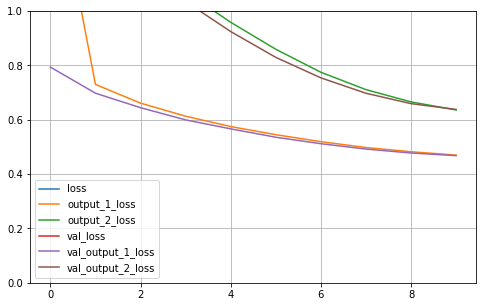

In [26]:
# Using history to plot all at once
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## 5. What if training lasts several hours? -- Use _Callbacks_

In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. But how can you tell the fit() method to save checkpoints? Use callbacks.

The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch.

```python
[...] # build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
```

Moreover, if you use a validation set during training, you can set
save_best_only=True when creating the ModelCheckpoint. In this case,
it will only save your model when its performance on the validation set is
the best so far. This way, you do not need to worry about training for too
long and overfitting the training set: simply restore the last model saved
after training, and this will be the best model on the validation set.

```python
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model
```

Another way to implement early stopping is to simply use the EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources).

```python
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])
```

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the EarlyStopping callback will keep track of the best weights and restore them for you at the end of
training.

There are many other callbacks available in the [keras.callbacks](https://keras.io/callbacks/) package.

If you need extra control, you can easily write your own custom callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

```python
class PrintValTrainRatioCallback(keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs): 
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
```

## 6. Fine-Tuning Neural Netwrok Hyperparameters

### **Cross-Validation with Scikit Learn**

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross-validation). For example, we can use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space. To do this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters.

In [28]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]): 
    model = keras.models.Sequential() 
    model.add(keras.layers.InputLayer(input_shape=input_shape)) 
    for _ in range(n_hidden): 
        model.add(keras.layers.Dense(n_neurons, activation="relu")) 
    model.add(keras.layers.Dense(1)) 
    optimizer = keras.optimizers.SGD(lr=learning_rate) 
    model.compile(loss="mse", optimizer=optimizer) 
    return model

Create a KerasRegressor based on this build_model() function. The KerasRegressor object is a thin wrapper around the Keras model built using build_model().  Since we did not specify any hyperparameters when creating it, it will use the default hyperparameters we defined in build_model(). Now we can use this object like a regular Scikit-Learn regressor: we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method.

In [29]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100, 
              validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# -ve sign bcoz score in sklearn --> higher is better
mse_test = - keras_reg.score(X_test, y_test) 
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.8450 - val_loss: 0.6923
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6524 - val_loss: 0.6021
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5836 - val_loss: 0.5307
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.5106
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5025 - val_loss: 0.4786
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4748 - val_loss: 0.4588
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4604 - val_loss: 0.4486
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4572 - val_loss: 0.4442
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4371 - val_loss: 0.4327
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4200 - val_lo

Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search. Let??s try to explore the number of hidden layers, the number of neurons, and the learning rate. Note that RandomizedSearchCV uses K-fold cross-validation, so it does not use X_valid and y_valid, which are only used for early stopping.

In [69]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = { 
    "n_hidden": [0, 1, 2, 3], 
    "n_neurons": np.arange(1, 100).tolist(), 
    "learning_rate": np.linspace(3e-4, 3e-2, 100).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, n_jobs=-1, verbose=0)
rnd_search_cv.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/home/p285464/.conda/envs/tfEnv_1/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [-3.59633277e-01 -3.17780644e-01 -3.68455321e-01 -1.45183082e+11
 -4.97349640e-01 -2.53535309e+28 -3.77947321e-01             nan
 -3.47724189e-01             nan]
  category=UserWarning


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8314 - val_loss: 0.4190
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6801 - val_loss: 0.3604
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3710 - val_loss: 0.3444
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3482 - val_loss: 0.3369
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3230 - val_loss: 0.3464
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3169 - val_loss: 0.3204
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3200 - val_loss: 0.3106
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3172 - val_loss: 0.3025
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3137 - val_loss: 0.3233
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3162 - val_loss: 0.3210

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x2b6130ee9510>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.0003, 0.0006,
                                                          0.0009, 0.0012,
                                                          0.0014999999999999998,
                                                          0.0017999999999999997,
                                                          0.0021, 0.0024,
                                                          0.0026999999999999997,
                                                          0.0029999999999999996,
                                                          0.0032999999999999995,
                                                          0.0035999999999999995,
                                                          0.0039, 0....
                                               

In [70]:
rnd_search_cv.best_params_, -rnd_search_cv.best_score_

({'n_neurons': 57, 'n_hidden': 3, 'learning_rate': 0.0288},
 0.31778064370155334)

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. Such techniques take care of the **zooming** process for you and lead to much better solutions in much less time. Here are some Python libraries you can use to optimize hyperparameters:

- [Keras Tuner](https://homl.info/kerastuner): An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted service for visualization and analysis.
- [Scikit-Optimize (skopt)](https://scikit-optimize.github.io/): A general-purpose optimization library. The BayesSearchCV class performs Bayesian optimization using an interface similar to
GridSearchCV.
- [Sklearn-Deap](https://github.com/rsteca/sklearn-deap): A hyperparameter optimization library based on evolutionary algorithms, with a GridSearchCV-like interface.

### **Number of Hidden Layers** 

- An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. But for complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

- Real-world data is often structured in a hierarchical way, and deep neural networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces). Not only does this hierarchical architecture help DNNs converge faster to a good solution, but it also improves their ability to generalize to new datasets.

- In summary, for many problems you can start with just one or two hidden layers and the neural network will work just fine. For instance, you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total number of neurons, in roughly the same amount of training time. For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, but not fully connected ones) and they need a huge amount of training data. You will rarely have to train such networks from scratch: it is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar task. Training will then be a lot faster and require much less data.

### **Number of Neurons per Hidden Layer**

- The number of neurons in the input and output layers is determined by the
type of input and output your task requires. For example, the MNIST task
requires 28 ×? 28 = 784 input neurons and 10 output neurons.

- As for the hidden layers, it used to be common to size them to form a
pyramid, with fewer and fewer neurons at each layer??the rationale being
that many low-level features can coalesce into far fewer high-level features.
A typical neural network for MNIST might have 3 hidden layers, the first
with 300 neurons, the second with 200, and the third with 100. However,
this practice has been largely abandoned because it seems that using the
same number of neurons in all hidden layers performs just as well in most
cases, or even better; plus, there is only one hyperparameter to tune, instead
of one per layer. That said, depending on the dataset, it can sometimes help
to make the first hidden layer bigger than the others.

- Just like the number of layers, you can try increasing the number of neurons
gradually until the network starts overfitting. But in practice, it??s often
simpler and more efficient to pick a model with more layers and neurons
than you actually need, then use early stopping and other regularization
techniques to prevent it from overfitting.

- In general you will get more bang for your buck by increasing the number of layers
instead of the number of neurons per layer.

### **Learning Rate, Batch Size, and Other Hyperparameters**

- The **learning rate** is arguably the most important hyperparameter. In
general, the optimal learning rate is about half of the maximum learning
rate (i.e., the learning rate above which the training algorithm diverges)
One way to find a good learning rate is to train
the model for a few hundred iterations, starting with a very low learning
rate (e.g., 1e-5) and gradually increasing it up to a very large value (e.g.,
10). This is done by multiplying the learning rate by a constant factor at
each iteration (e.g., by exp(log(1e+6)/500) to go from 1e+5 to 10 in 500
iterations). If you plot the loss as a function of the learning rate (using a
log scale for the learning rate), you should see it dropping at first. But
after a while, the learning rate will be too large, so the loss will shoot
back up: the optimal learning rate will be a bit lower than the point at
which the loss starts to climb (typically about 10 times lower than the
turning point). You can then reinitialize your model and train it
normally using this good learning rate.

- Choosing a better **optimizer** than plain old Mini-batch Gradient Descent
(and tuning its hyperparameters) is also quite important. 

- The **batch size** can have a significant impact on your model??s
performance and training time. The main benefit of using large batch
sizes is that hardware accelerators like GPUs can process them
efficiently so the training algorithm will see more
instances per second. There??s a catch, though: in practice, large batch 
sizes often lead to training instabilities, especially at the beginning of training, and the
resulting model may not generalize as well as a model trained with a small batch size.

- For **activation function** in general, the ReLU activation function will be a good default
for all hidden layers. For the output layer, it really depends on your task.

- In most cases, the number of training iterations (**epochs**) does not actually need to
be tweaked: just use early stopping instead.

**NOTE**: The optimal learning rate depends on the other hyperparameters -- especially the batch
size -- so if you modify any hyperparameter, make sure to update the learning rate as
well.